#   Marketing Analytics for e-commerce market palce company
                                                        


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce
import scipy.stats as stats
import statistics as statz

import matplotlib.pyplot as plt
%matplotlib inline

# importing data 

In [6]:
customers = pd.read_csv(r"C:\Users\yadav\Documents\excersise\CUSTOMERS.csv")
sellers = pd.read_csv(r"C:\Users\yadav\Documents\excersise\SELLERS.csv")
products=pd.read_csv(r"C:\Users\yadav\Documents\excersise\PRODUCTS.csv")
orders=pd.read_csv(r"C:\Users\yadav\Documents\excersise\ORDERS.csv")
order_iteams=pd.read_csv(r"C:\Users\yadav\Documents\excersise\ORDER_ITEMS.csv")
order_payments=pd.read_csv(r"C:\Users\yadav\Documents\excersise\ORDER_PAYMENTS.csv")
order_Review_Ratings=pd.read_csv(r"C:\Users\yadav\Documents\excersise\ORDER_REVIEW_RATINGS.csv")
geo_Location=pd.read_csv(r"C:\Users\yadav\Documents\excersise\GEO_LOCATION.csv")

In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [8]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [9]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [10]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [11]:
orders.dtypes


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [12]:
order_iteams.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [13]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [14]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [15]:
order_Review_Ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [16]:
order_Review_Ratings.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [17]:
geo_Location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [18]:
geo_Location.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

# EDA

In [19]:
dfs = [orders, order_Review_Ratings, order_payments,order_iteams]



In [20]:
order= reduce(lambda  left,right: pd.merge(left,right,on=['order_id'],
                                            how='inner'), dfs)


In [21]:
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [22]:
orders=pd.merge(left=order,right=products,how="inner",left_on="product_id",right_on="product_id")

In [23]:
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,29.99,8.72,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,29.99,8.72,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,29.99,8.72,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/2017 18:29,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,b46f1e34512b0f4c74a72398b03ca788,4,...,29.99,7.78,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/2017 18:24,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,dc90f19c2806f1abba9e72ad3c350073,5,...,29.99,7.78,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [24]:
orders=pd.merge(left=orders,right=sellers,how="inner",left_on="seller_id",right_on="seller_id")

In [25]:
orders=pd.merge(left=orders,right=customers,how="inner",left_on="customer_id",right_on="customer_id")

In [26]:
orders.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_descript

In [27]:
orders=pd.merge(left=orders,right=geo_Location,how="inner",left_on="seller_zip_code_prefix",right_on="geolocation_zip_code_prefix")

In [28]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/2017 18:29,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,b46f1e34512b0f4c74a72398b03ca788,4,...,Chhattisgarh,3a51803cc0d012c3b5dc8b7528cb05f7,3366,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/2017 18:24,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,dc90f19c2806f1abba9e72ad3c350073,5,...,Chhattisgarh,ef0996a1a279c26e7ecbd737be23d235,2290,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh


In [29]:
orders.dtypes.count()

42

In [30]:
# lets convert all the date formats 
import pandas as pd

# Assuming the dataframe is stored in a variable named 'df'
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date',
                'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

for column in date_columns:
    orders[column] = pd.to_datetime(orders[column])


In [31]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                              int64
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   

In [32]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1250
order_delivered_customer_date    2584
order_estimated_delivery_date       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1733
product_name_lenght              1708
product_description_lenght       1708
product_photos_qty               1708
product_weig

In [33]:
# Total Quantity
total_quantity = orders['product_id'].count()
print('Total Quantity: ', total_quantity)

Total Quantity:  118050


In [34]:
orders['revenue'] = orders['price'] * orders['payment_installments']


In [35]:
# Total Revenue
total_revenue = orders['price'].sum()
print('Total Revenue: ', total_revenue)

Total Revenue:  14248072.290000001


In [36]:
# Total Products
total_products = orders['product_id'].nunique()
total_products

32889

In [37]:
# Total Categories
total_categories = orders['product_category_name'].nunique()
total_categories

71

In [38]:
# Total Sellers
total_sellers = orders['seller_id'].nunique()
total_sellers

3088

In [39]:
# Total Locations
total_locations = orders.groupby(['seller_city', 'seller_state']).size().count()
total_locations

534

In [40]:
# Total Channels
total_channels = orders['customer_unique_id'].nunique()
total_channels

95216

In [41]:
# Total Payment Methods
total_payment_methods = orders['payment_type'].nunique()
total_payment_methods


4

In [42]:
orders['payment_type'].value_counts()


credit_card    87054
UPI            22973
voucher         6327
debit_card      1696
Name: payment_type, dtype: int64

# B.Understanding how many new customers acquired every month

In [43]:
orders['month'] = orders['order_purchase_timestamp'].dt.month


<AxesSubplot:xlabel='month'>

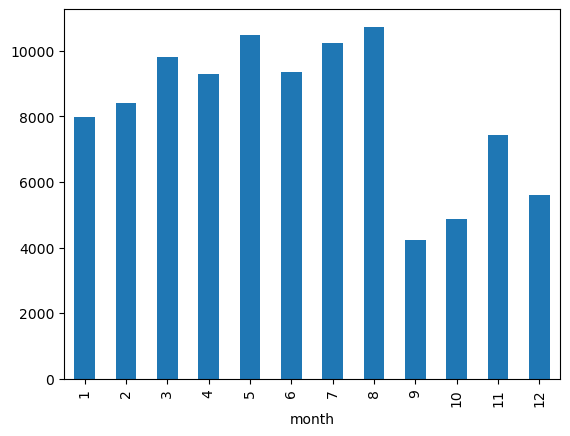

In [44]:
new_cust=orders.groupby('month')['customer_id'].nunique()
new_cust.plot(kind='bar')

# c. Understand the retention of customers on month on month basis


In [45]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state', 'revenue',
       'month']

In [46]:
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].astype(str)

# create a column with the month of each order
orders['month'] = orders['order_purchase_timestamp'].apply(lambda x: x.split('-')[1])

# group the data by customer_id and month and count the number of orders per customer per month
grouped = orders.groupby(['customer_id', 'month'], as_index=False).count()[['customer_id', 'month', 'order_id']]

# pivot the data to create a table with customer_id as rows and months as columns, and the number of orders as values
pivoted = grouped.pivot(index='customer_id', columns='month', values='order_id')

# replace missing values with 0
pivoted = pivoted.fillna(0)

# calculate the retention rate for each month
retention_rates = pivoted.divide(pivoted.sum(axis=1), axis=0).reset_index()

# display the retention rates


In [47]:
retention_rates

month,customer_id,01,02,03,04,05,06,07,08,09,10,11,12
0,00012a2ce6f8dcda20d059ce98491703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,000161a058600d5901f007fab4c27140,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0001fd6190edaaf884bcaf3d49edf079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0002414f95344307404f0ace7a26f1d5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,000379cdec625522490c315e70c7a9fb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98444,fffcb937e9dd47a13f05ecb8290f4d3e,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98445,fffecc9f79fd8c764f843e9951b11341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98446,fffeda5b6d849fbd39689bb92087f431,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98447,ffff42319e9b2d713724ae527742af25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# d. How the revenues from existing/new customers on month on month basis

In [48]:
orders['revenue'] = orders['price'] * orders['payment_installments']


In [49]:
orders['customer_type'] = orders.groupby('customer_unique_id')['order_purchase_timestamp'].transform('size').apply(lambda x: 'existing' if x > 1 else 'new')


In [50]:
revenue_by_month_and_type = orders.groupby(['month', 'customer_type'])['revenue'].sum().reset_index()


In [51]:
revenue_by_month_and_type

,month,customer_type,revenue
0,01,existing,998707.64
1,01,new,3258869.40
2,02,existing,1042349.24
3,02,new,3265074.25
4,03,existing,1258579.12
5,03,new,4750403.75
6,04,existing,1292338.13
7,04,new,4587335.58
8,05,existing,1599914.83
9,05,new,5103829.42


# e.Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [52]:
# Create new columns for year, month, week, day, and time
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['week'] = orders['order_purchase_timestamp'].dt.week
orders['day'] = orders['order_purchase_timestamp'].dt.day
orders['time'] = orders['order_purchase_timestamp'].dt.time


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
orders['sales'] = orders['price'] * orders['payment_installments']


In [ ]:
# Group the data by category and plot the sales and quantity for each category
orders_category = orders.groupby('product_category_name')['sales'].sum()
orders_category.plot(kind='line', figsize=(20, 7))
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()


In [ ]:
# Sales trend by month
sales_by_month = orders.groupby(['month'])['payment_value'].sum()
sales_by_month.plot(kind='bar', figsize=(10,5))
plt.title("Sales Trend by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Sales trend by location
sales_by_location = orders.groupby(['geolocation_city'])['payment_value'].sum()
sales_by_location.plot(kind='bar', figsize=(20,10))
plt.title("Sales Trend by Location")
plt.xlabel("Location")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Sales trend by week
sales_by_week = orders.groupby(['week'])['payment_value'].sum()
sales_by_week.plot(kind='bar', figsize=(10,5))
plt.title("Sales Trend by Week")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Sales trend by day
sales_by_day = orders.groupby(['day'])['payment_value'].sum()
sales_by_day.plot(kind='line', figsize=(15,5))
plt.title("Sales Trend by Day")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Sales trend by time
sales_by_time = orders.groupby(['time'])['payment_value'].sum()
sales_by_time.plot(kind='line', figsize=(20,5))
plt.title("Sales Trend by Time")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()


In [ ]:
# sales_by_payment_type
sales_by_payment_type = orders.groupby(['payment_type'])['payment_value'].sum()
sales_by_payment_type.plot(kind='bar', figsize=(10,5))
plt.title("Sales Trend by payment method")
plt.xlabel("payment method")
plt.ylabel("Sales")
plt.show()

# g. Popular categories by state, month


In [ ]:
grouped = orders.groupby(["month", "seller_state", "product_category_name"]).agg({'sales': 'sum'})

# Pivot the data to create the bar graph
pivot = grouped.pivot_table(index="month", columns="product_category_name", values="sales")

pivot

In [ ]:
ax=pivot.plot(kind='bar',figsize=(25,13),width=0.8
             )
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5),fontsize=4)



In [ ]:
pivot2= grouped.pivot_table(index="seller_state", columns="product_category_name", values="sales")
pivot2

In [ ]:
ax=pivot.plot(kind='bar',figsize=(40,13),width=0.9
             )
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5),fontsize=6)

# h. List top 10 most expensive products sorted by price


In [ ]:
# sort the data by price in descending order
orders = orders.sort_values(by='price', ascending=False)

In [ ]:
orderstop_10_expensive = orders.head(10)

top_10_expensive = orderstop_10_expensive[['product_id', 'price']]


In [ ]:
top_10_expensive

# 2.Performing Customers/sellers Segmentation
a. Divide the customers into groups based on the revenue generated 

b. Divide the sellers into groups based on the revenue generated 

In [ ]:
# Divide the customers into groups based on the revenue generated
# Create a new column 'revenue_group' based on the customer's revenue
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Low', 'Low-Medium', 'Medium', 'High-Medium', 'High']
orders['cust_revenue_group'] = pd.cut(orders['revenue'], bins=bins, labels=labels)

# Show the updated dataframe
orders= orders.reset_index()

In [ ]:
orders[["cust_revenue_group","customer_id"]]

In [ ]:

# Group data by seller_id and calculate the sum of revenue for each seller
grouped = orders.groupby('seller_id').sum().reset_index()

# Create a new column "group" based on the revenue generated by each seller
bins = [0, 1000, 5000, 10000, 50000, 100000, grouped['revenue'].max()]
orders['seller_revenue_group'] = pd.cut(orders['revenue'], bins, labels=['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High', 'Very High'])

orders

In [ ]:
orders[["seller_revenue_group","customer_id"]]

# 3.Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)


In [ ]:
orders.columns

In [ ]:
# Find all product combinations
from itertools import combinations
combinations_list = list(combinations(orders['product_id'].unique(), 2)) + \
                     list(combinations(orders['product_id'].unique(), 3))

# Count frequency of each combination
combination_counts = defaultdict(int)
for comb in combinations_list:
    comb_orders = orders[orders['product_id'].isin(comb)]
    comb_order_ids = comb_orders.groupby('order_id').agg({'product_id': 'count'})
    comb_order_ids = comb_order_ids[comb_order_ids['product_id'] == len(comb)].index
    comb_products = comb_orders[comb_orders['order_id'].isin(comb_order_ids)]
    combination_counts[comb] = comb_products.shape[0]

# Get the top 10 combinations
top_10_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the result
for comb, count in top_10_combinations:
    print("Combination: {}\tCount: {}".format(comb, count))


# 4. Payment Behaviour
a. How customers are paying?

b. Which payment channels are used by most customers?

In [ ]:
grouped = orders.groupby("payment_installments")["order_id"].count()
grouped.reset_index()

In [ ]:
grouped.plot(kind="bar")

# add a title and labels for the x and y axis
plt.title("Payment Methods Used by Customers")
plt.xlabel("Payment Type")
plt.ylabel("Number of Orders")

In [ ]:
payment_channel = orders.groupby("payment_type")["order_id"].count()

# plot the results using a bar chart
payment_channel.plot(kind="bar")

# add a title and labels for the x and y axis
plt.title("Payment Methods Used by Customers")
plt.xlabel("Payment Type")
plt.ylabel("Number of Orders")


# 5. Customer satisfaction towards category & product

a. Which categories (top 10) are maximum rated & minimum rated?

b. Which products (top10) are maximum rated & minimum rated?

c. Average rating by location, seller, product, category, month etc.

In [ ]:
# group the data by product category name and calculate the average rating for each category
grouped = orders.groupby("product_category_name")["review_score"].mean()

# sort the results in ascending order
grouped_sorted = grouped.sort_values()

# get the top 10 categories with the lowest average rating
bottom_10 = grouped_sorted.head(10)

# get the top 10 categories with the highest average rating
top_10 = grouped_sorted.tail(10)

In [ ]:
top_10.plot(kind="bar", color="green", title="Top 10 Categories (Highest Rated)")

In [ ]:
bottom_10.plot(kind="bar", color="red", title="Bottom 10 Categories (Lowest Rated)")


In [ ]:
# group the data by product ID and calculate the average rating for each product
grouped = orders.groupby("product_id")["review_score"].mean()

# sort the results in ascending order
grouped_sorted = grouped.sort_values()

# get the top 10 products with the lowest average rating
bottom_10 = grouped_sorted.head(10)

# get the top 10 products with the highest average rating
top_10 = grouped_sorted.tail(10)

# plot the results using bar charts
top_10.plot(kind="bar", color="green", title="Top 10 Products (Highest Rated)")

# add labels for the x and y axis
plt.xlabel("Product ID")
plt.ylabel("Average Rating")

# show the plots
plt.show()


In [ ]:
bottom_10.plot(kind="bar", color="red", title="Bottom 10 Products (Lowest Rated)")
# add labels for the x and y axis
plt.xlabel("Product ID")
plt.ylabel("Average Rating")
plt.show()


In [ ]:
#c)
# group the data by location and calculate the average rating for each location
avg_location_rating = orders.groupby("geolocation_city")["review_score"].mean().reset_index()
avg_location_rating

In [ ]:
# group the data by seller and calculate the average rating for each seller
seller_avg_rating = orders.groupby("seller_id")["review_score"].mean().reset_index()


In [ ]:
seller_avg_rating.head()

In [ ]:
# group the data by product and calculate the average rating for each product
product_avg_rating = orders.groupby("product_id")["review_score"].mean().reset_index()

In [ ]:
product_avg_rating

In [ ]:
# group the data by category and calculate the average rating for each category
category_avg_rating = orders.groupby("product_category_name")["review_score"].mean().reset_index()
category_avg_rating

In [ ]:
category_avg_rating.plot(kind="bar", title="Average Rating by Category",figsize=(20,10))
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
# group the data by month and calculate the average rating for each month
orders["month"] = pd.to_datetime(orders["review_creation_date"]).dt.month
month_rating = orders.groupby("month")["review_score"].mean()
month_rating

In [ ]:
month_rating.plot(kind="bar", title="Average Rating by Month")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
orders.columns